In [27]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

class RBFN:
    def __init__(self, centers , flag, sigma=0.1, lamda = 0.5 ):
        self.sigma = sigma
        self.centers = centers
        self.weights = None
        self.flag = flag
        self.lamda = lamda

    def _kernel_function(self, X, centers):
        return np.exp(-cdist(X, centers) ** 2 / (2 * self.sigma ** 2))

    def fit(self, X, y):
        Phi = self._kernel_function(X, self.centers)
        #print(Phi)
        self.weights = np.linalg.lstsq(Phi, y, rcond=None)[0]
        if self.flag ==1:
            print('regularization method')
            self.weights = np.linalg.inv(Phi.T@Phi+self.lamda * np.eye(40) ) @Phi.T@ y 

    def predict(self, X):
        Phi = self._kernel_function(X, self.centers)
        return np.dot(Phi, self.weights)




In [28]:
class RBFN_RandomCenter:
    def __init__(self, centers, sigma=1.0):
        self.centers = centers
        self.sigma = sigma

    def _kernel_function(self, X):
        return np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))

    def fit(self, X, y):
        Phi = self._kernel_function(X)
        #print(Phi.shape)
        self.weights = np.linalg.lstsq(Phi, y, rcond=None)[0]

    def predict(self, X):
        Phi = self._kernel_function(X)
        return np.dot(Phi, self.weights)

weights:
 [[-1.06970665e+02]
 [ 4.40139514e+02]
 [-9.34133081e+02]
 [ 1.28771356e+03]
 [-1.10160511e+03]
 [ 6.86502163e+00]
 [ 2.32688004e+03]
 [-6.28231900e+03]
 [ 1.22495990e+04]
 [-2.04352259e+04]
 [ 3.06600566e+04]
 [-4.23653515e+04]
 [ 5.48449768e+04]
 [-6.75603449e+04]
 [ 8.02886606e+04]
 [-9.29479657e+04]
 [ 1.05165619e+05]
 [-1.15876131e+05]
 [ 1.23189159e+05]
 [-1.24692791e+05]
 [ 1.18115030e+05]
 [-1.02120613e+05]
 [ 7.68664634e+04]
 [-4.41597661e+04]
 [ 7.21511259e+03]
 [ 2.98901736e+04]
 [-6.29446612e+04]
 [ 8.83437778e+04]
 [-1.03634348e+05]
 [ 1.07830642e+05]
 [-1.01485391e+05]
 [ 8.66358707e+04]
 [-6.65339416e+04]
 [ 4.50950560e+04]
 [-2.60156230e+04]
 [ 1.18566783e+04]
 [-3.45617158e+03]
 [-6.13028388e+01]
 [ 6.36339057e+02]
 [-2.45740262e+02]]
RMSE of test set: 0.29988665230845457


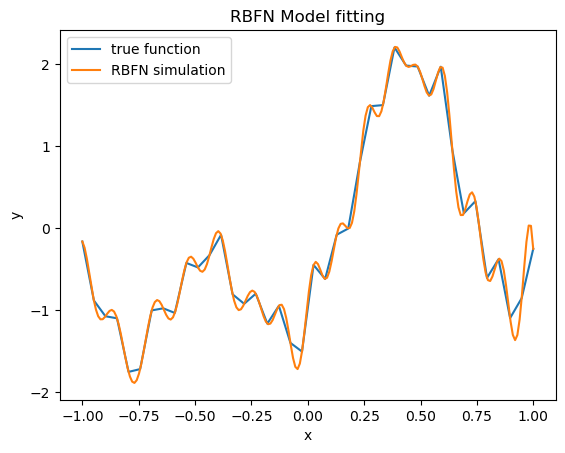

In [29]:
# Generate training data with noise
np.random.seed(42)  # For reproducibility
X_train = np.linspace(-1, 1, 40).reshape(-1, 1)
noise = 0.3 * np.random.randn(40, 1)
y_train = 1.2 * np.sin(np.pi * X_train) - np.cos(2.4 * np.pi * X_train) + noise


#  train RBFN model
rbfn = RBFN(centers = X_train, flag = 0, sigma=0.1)
rbfn.fit(X_train, y_train)

## weights
print('weights:\n',rbfn.weights)

# test model
X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
y_pred = rbfn.predict(X_test)
y_test = 1.2 * np.sin(np.pi * X_test) - np.cos(2.4 * np.pi * X_test)

mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
print('RMSE of test set:',rmse)

## plot
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, label='true function')
plt.plot(X_test, y_pred, label='RBFN simulation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RBFN Model fitting')
plt.legend()
plt.show()

weights:
 [[-1.06970665e+02]
 [ 4.40139514e+02]
 [-9.34133081e+02]
 [ 1.28771356e+03]
 [-1.10160511e+03]
 [ 6.86502163e+00]
 [ 2.32688004e+03]
 [-6.28231900e+03]
 [ 1.22495990e+04]
 [-2.04352259e+04]
 [ 3.06600566e+04]
 [-4.23653515e+04]
 [ 5.48449768e+04]
 [-6.75603449e+04]
 [ 8.02886606e+04]
 [-9.29479657e+04]
 [ 1.05165619e+05]
 [-1.15876131e+05]
 [ 1.23189159e+05]
 [-1.24692791e+05]
 [ 1.18115030e+05]
 [-1.02120613e+05]
 [ 7.68664634e+04]
 [-4.41597661e+04]
 [ 7.21511259e+03]
 [ 2.98901736e+04]
 [-6.29446612e+04]
 [ 8.83437778e+04]
 [-1.03634348e+05]
 [ 1.07830642e+05]
 [-1.01485391e+05]
 [ 8.66358707e+04]
 [-6.65339416e+04]
 [ 4.50950560e+04]
 [-2.60156230e+04]
 [ 1.18566783e+04]
 [-3.45617158e+03]
 [-6.13028388e+01]
 [ 6.36339057e+02]
 [-2.45740262e+02]]
RMSE of test set: 0.21308856488237157


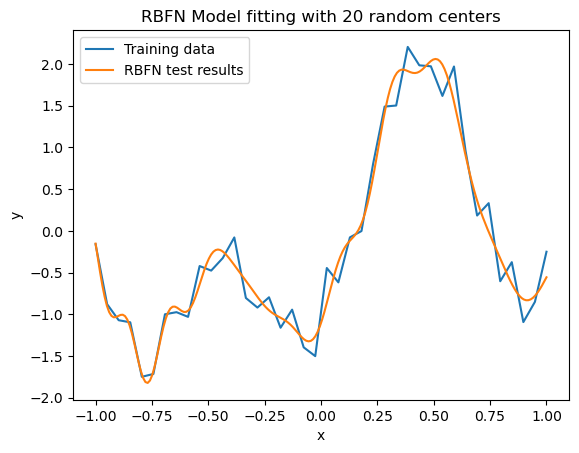

In [30]:
# Randomly select 20 points as centers

random_indices = np.random.choice(X_train.shape[0], size=20, replace=False)
centers = X_train[random_indices]

# Create and train the RBFN model
rbfn_20cen = RBFN_RandomCenter(centers, sigma=0.1)
rbfn_20cen.fit(X_train, y_train)

## weights
print('weights:\n',rbfn.weights)

# 测试训练好的模型
X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
y_pred = rbfn_20cen.predict(X_test)
y_test = 1.2 * np.sin(np.pi * X_test) - np.cos(2.4 * np.pi * X_test)

mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
print('RMSE of test set:',rmse)

## plot
plt.plot(X_train, y_train, label='Training data')
plt.plot(X_test, y_pred, label='RBFN test results')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RBFN Model fitting with 20 random centers')
plt.legend()
plt.show()


(40, 1)

regularization method
RMSE of test set: 0.17582231396330283


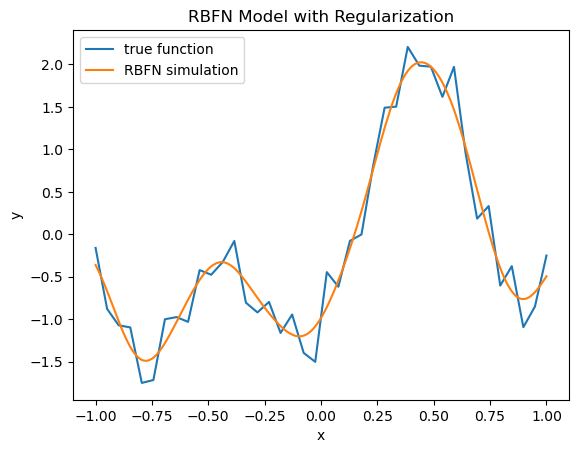

regularization method
RMSE of test set: 0.2355653946770824


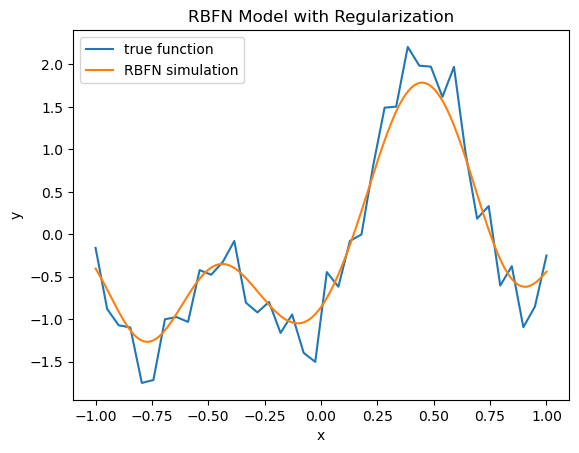

regularization method
RMSE of test set: 0.4318002943137134


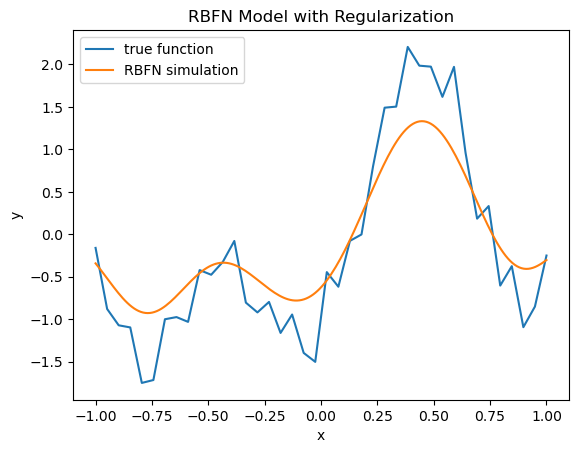

In [12]:
### regularization with factor lamda

for factor in [0.5,3,10]:
    rbfn_reg = RBFN(X_train, flag = 1, sigma=0.1, lamda = factor)
    rbfn_reg.fit(X_train, y_train)

    # 测试训练好的模型
    X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
    y_pred = rbfn_reg.predict(X_test)
    y_test = 1.2 * np.sin(np.pi * X_test) - np.cos(2.4 * np.pi * X_test)

    mse = np.mean((y_pred - y_test) ** 2)
    rmse = np.sqrt(mse)
    print('RMSE of test set:',rmse)

    #plot

    plt.plot(X_train, y_train, label='true function')
    plt.plot(X_test, y_pred, label='RBFN simulation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('RBFN Model with Regularization')
    plt.legend()
    plt.show()

In [13]:
X_train.shape

(40, 1)